In [2]:
import pandas as pd
import os

In [8]:
# Base URL without the filename
base_url = "http://cicresearch.ca/IOTDataset/CIC_IOT_Dataset2023/Dataset/CSV/MERGED_CSV/"

# Store all the DataFrames
dfs = []

# Loop through file numbers 1 to 63
for i in range(1, 11):
    # Create filename with zero padding
    filename = f"Merged{i:02d}.csv"
    url = base_url + filename

    # Read CSV into DataFrame
    df = pd.read_csv(url)

    # Print filename and number of rows
    print(f"Loaded {filename} with {len(df)} rows.")

    # Append to list
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

print("All files loaded and merged!")

Loaded Merged01.csv with 712311 rows.
Loaded Merged02.csv with 748585 rows.
Loaded Merged03.csv with 697289 rows.
Loaded Merged04.csv with 676620 rows.
Loaded Merged05.csv with 744804 rows.
Loaded Merged06.csv with 718229 rows.
Loaded Merged07.csv with 702212 rows.
Loaded Merged08.csv with 712220 rows.
Loaded Merged09.csv with 678882 rows.
Loaded Merged10.csv with 916190 rows.
All files loaded and merged!


In [ ]:
df.head()
df.shape # 7 million rows, 40 columns

# Check for the nulls
print(df.isnull().sum()) # The result was that 95 rows were missing variance

# Drop rows where 'Variance' and 'Std' is missing
df = df.dropna(subset=['Variance'])
df = df.dropna(subset=['Std'])

In [ ]:
print(df.isnull().sum())
df.shape

In [26]:
# Before dropping duplicate rows
print("Before dropping duplicates:", df.shape)

# Drop duplicate rows
df = df.drop_duplicates()

# After dropping duplicate rows
print("After dropping duplicates:", df.shape)

Before dropping duplicates: (7307247, 40)
After dropping duplicates: (4128252, 40)


We've removed duplicates and null rows, now well do EDA.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128252 entries, 0 to 7307337
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Header_Length    float64
 1   Protocol Type    int64  
 2   Time_To_Live     float64
 3   Rate             float64
 4   fin_flag_number  float64
 5   syn_flag_number  float64
 6   rst_flag_number  float64
 7   psh_flag_number  float64
 8   ack_flag_number  float64
 9   ece_flag_number  float64
 10  cwr_flag_number  float64
 11  ack_count        int64  
 12  syn_count        int64  
 13  fin_count        int64  
 14  rst_count        int64  
 15  HTTP             float64
 16  HTTPS            float64
 17  DNS              float64
 18  Telnet           float64
 19  SMTP             float64
 20  SSH              float64
 21  IRC              float64
 22  TCP              float64
 23  UDP              float64
 24  DHCP             float64
 25  ARP              float64
 26  ICMP             float64
 27  IGMP             

Label
DDOS-ICMP_FLOOD            427956
DDOS-UDP_FLOOD             400278
DDOS-SYN_FLOOD             352988
DOS-UDP_FLOOD              350566
DDOS-PSHACK_FLOOD          342435
DDOS-TCP_FLOOD             325352
DDOS-RSTFINFLOOD           281782
DDOS-SYNONYMOUSIP_FLOOD    263094
DOS-TCP_FLOOD              230386
DOS-SYN_FLOOD              217552
BENIGN                     170171
MIRAI-GREETH_FLOOD         151952
MIRAI-UDPPLAIN             134792
MIRAI-GREIP_FLOOD          115547
DDOS-ICMP_FRAGMENTATION     70528
VULNERABILITYSCAN           57895
MITM-ARPSPOOFING            44665
DDOS-ACK_FRAGMENTATION      44507
DDOS-UDP_FRAGMENTATION      44383
DNS_SPOOFING                27354
RECON-HOSTDISCOVERY         20983
RECON-OSSCAN                14914
RECON-PORTSCAN              12538
DOS-HTTP_FLOOD              11175
DDOS-HTTP_FLOOD              4460
DDOS-SLOWLORIS               3669
DICTIONARYBRUTEFORCE         2081
BROWSERHIJACKING              918
SQLINJECTION                  822
COMMANDI

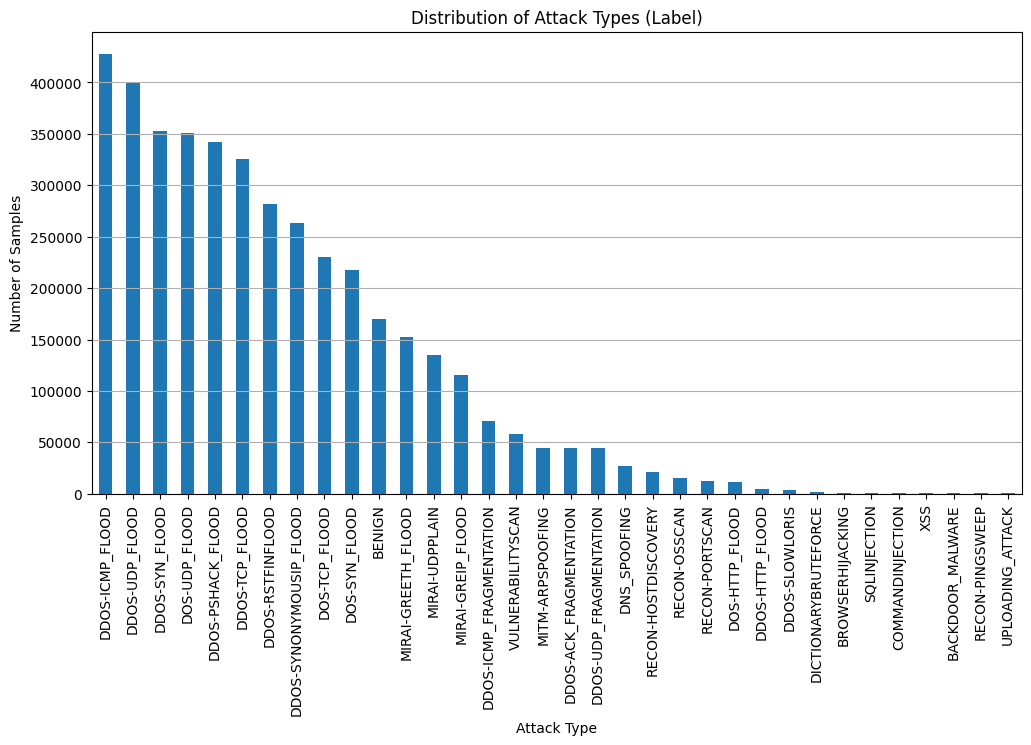

In [29]:
# Count of each attack type
print(df['Label'].value_counts()) # Shows the severe class imbalance

# Plot class distribution
df['Label'].value_counts().plot(kind='bar', figsize=(12,6))

plt.title('Distribution of Attack Types (Label)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()